In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import os
import boto3

In [3]:
MODEL_PATH = "models/model.pt"

AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_S3_BUCKET = os.environ.get("AWS_S3_BUCKET")
AWS_S3_ENDPOINT = os.environ.get("AWS_S3_ENDPOINT")

In [4]:
session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)
client = session.client("s3", endpoint_url=AWS_S3_ENDPOINT)

In [5]:
client.download_file(AWS_S3_BUCKET, MODEL_PATH, "/tmp/model.pt")


0: 448x640 4 persons, 1 sports ball, 36.5ms
Speed: 1.7ms preprocess, 36.5ms inference, 46.6ms postprocess per image at shape (1, 3, 448, 640)


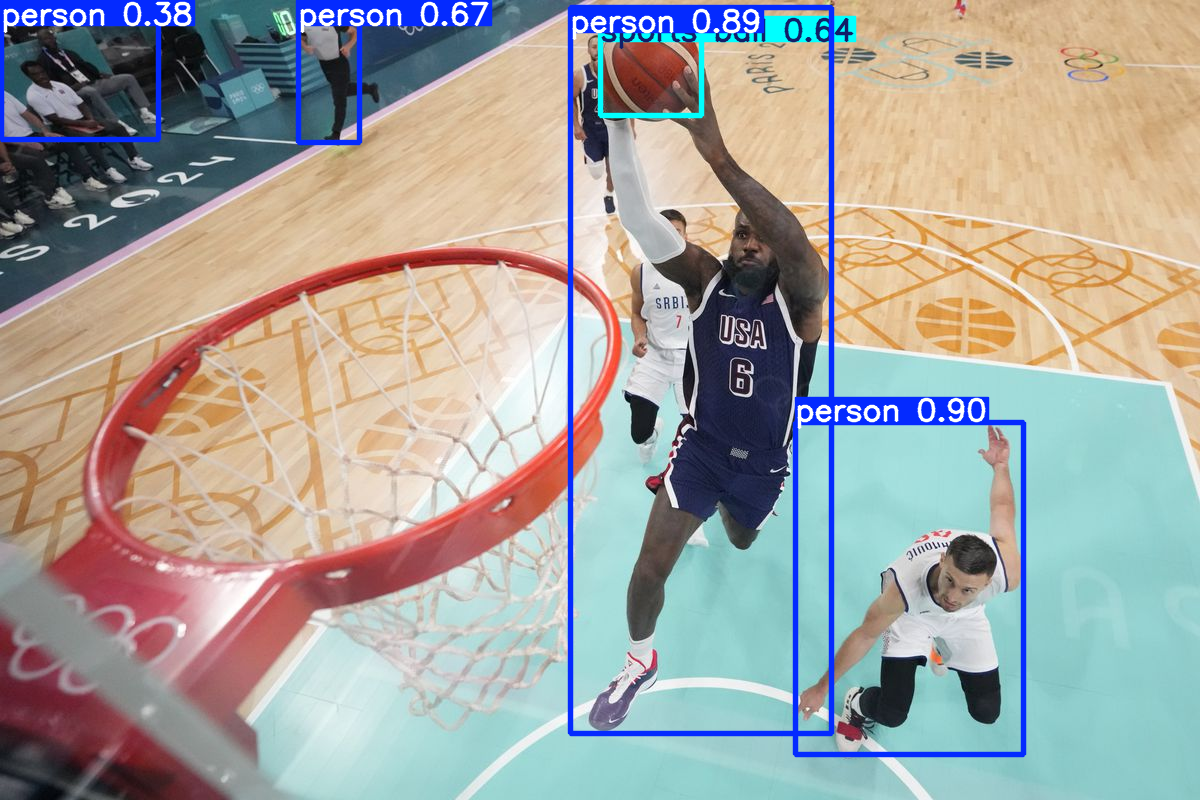

In [6]:
model = YOLO("/tmp/model.pt")
results = model(["https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg"])
results[0].show()